In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def showOpencvImage(image, isGray=False):
    fig = plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap = 'gray')
    plt.show()

In [ ]:
#Mount Google Drive
!pwd
!ls drive/My\ Drive/Colab\ Notebooks/Lectures/Lecture1/

/content
beagle.png  Lecture1a.ipynb  Lecture1b.ipynb


# Linear discrimination
In the example below discrimination between classes is made based on the value of a linear scoring function:

![alt text](https://sites.google.com/site/zbislawtabor/dydaktyka/ml/Fig1.png)

where xi is an object descriptor (feature vector)
# Classical approaches based on linear discrimination boudaries:
LDA

SVM

(3072,)
(3, 3072)
(3,)
[INFO] dog: 7963.93
[INFO] cat: -2930.99
[INFO] panda: 3362.47


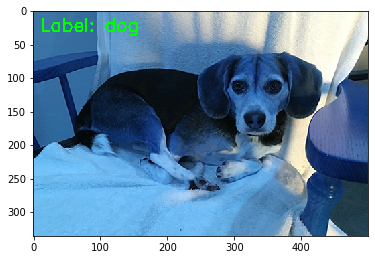

In [ ]:
# initialize the class labels and set the seed of the pseudorandom
# number generator so we can reproduce our results
labels = ["dog", "cat", "panda"]
np.random.seed(1)

# randomly initialize our weight matrix and bias vector -- in a
# *real* training and classification task, these parameters would
# be *learned* by our model, but for the sake of this example,
# let's use random values
W = np.random.randn(3, 3072)
b = np.random.randn(3)

# load our example image, resize it, and then flatten it into our
# "feature vector" representation
orig = cv2.imread("beagle.png")
image = cv2.resize(orig, (32, 32)).flatten()

print(image.shape)
print(W.shape)
print(b.shape)

# compute the output scores by taking the dot product between the
# weight matrix and image pixels, followed by adding in the bias
scores = W.dot(image) + b

# loop over the scores + labels and display them
for (label, score) in zip(labels, scores):
	print("[INFO] {}: {:.2f}".format(label, score))

# draw the label with the highest score on the image as our
# prediction
cv2.putText(orig, "Label: {}".format(labels[np.argmax(scores)]),
	(10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)


#im = [orig[:,:,i] for i in [2,1,0]]
#for i in range(0,3):
#    np.copyto(orig[:,:,i], im[i])

# display our input image

showOpencvImage(orig)

# Discriminating functions for feed forward deep learning

Output = Activation_N ( W_N* (Activation_(N-1)(W_(N_-1)
(
....
Activation_1 (W_1*Input)
...
) ) ) )

While activations are elements of a model (are fixed), the model matrices W_i are learnt from data based on some optimization procedure.

The kind of optimization here is **supervised learning**.
A well known example of an supervised learning approach is linear regression.

# Activations

Activations used in deep learning are **differentiable**.
![alt text](https://sites.google.com/site/zbislawtabor/dydaktyka/ml/Fig2.png)

# Data for supervised learning

1.   Training input data + annotations
2.   Validation data for model selection + annotations
3.   Testing data + annotations


# Gradient descent

In the next example, we find a matrix of weights W that minimizes the loss function

(y_true-y_pred) ** 2

where ypred = trainX.dot (W)

trainX has three components (x1, x2,1), We also has three components (W1, W2, W3), x1 and x2 are coordinates of the object on the plane
but trainX.dot (W) is the marked distance of the point (x1, x2) from the straight line W1 * x1 + W2 * x2 + W3 = 0 (point above the straight line or below the straight line).

The optimization procedure is therefore looking for a straight line separating the two classes, so that the accuracy of the classification is the best.

This is similar to Linear SVM or LDA classifiers

In many dimensions, the product of traiX.doc (W) is still interpreted as a distance from hyperplane.

**We will derive the equation for gradient descent.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import argparse

def sigmoid_activation(x):
	# compute the sigmoid activation value for a given input
	return 1.0 / (1 + np.exp(-x))

def sigmoid_deriv(x):
	# compute the derivative of the sigmoid function ASSUMING
	# that the input `x` has already been passed through the sigmoid
	# activation function y = 1/(1+exp(-x)) dy/dx = (1-y)*y
	return x * (1 - x)

def predict(X, W):
	# take the dot product between our features and weight matrix
	preds = sigmoid_activation(X.dot(W))

	# apply a step function to threshold the outputs to binary
	# class labels
	preds[preds <= 0.5] = 0
	preds[preds > 0] = 1

	# return the predictions
	return preds

0
1
[INFO] training...
(1000, 3)
(3, 1)
[INFO] epoch=1, loss=217.2513284
[INFO] epoch=5, loss=7.5558164
[INFO] epoch=10, loss=3.1764225
[INFO] epoch=15, loss=1.5059106
[INFO] epoch=20, loss=0.7754311
[INFO] evaluating...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

Model matrix  [[-0.71399449]
 [-1.56634609]
 [-1.24994231]]


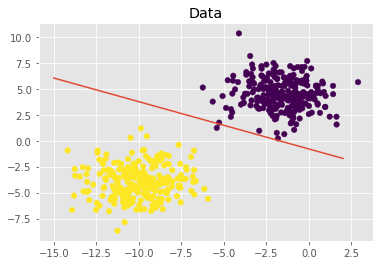

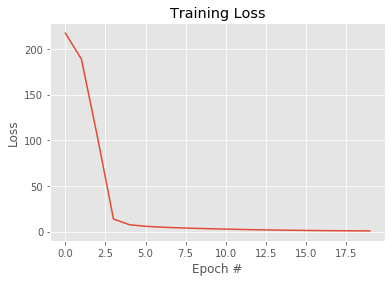

In [ ]:
EPOCHS = 20
LEARNING_RATE = 0.01

# generate a 2-class classification problem with 1,000 data points,
# where each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=1000, n_features=2, centers=2,
	cluster_std=1.5, random_state=1)
y = y.reshape((y.shape[0], 1))

print(np.min(y))
print(np.max(y))

# insert a column of 1's as the last entry in the feature
# matrix -- this little trick allows us to treat the bias
# as a trainable parameter within the weight matrix
X = np.c_[X, np.ones((X.shape[0]))]

# partition the data into training and testing splits using 50% of
# the data for training and the remaining 50% for testing
(trainX, testX, trainY, testY) = train_test_split(X, y,
	test_size=0.5, random_state=42)

# initialize our weight matrix and list of losses
print("[INFO] training...")
W = np.random.randn(X.shape[1], 1)

print(X.shape)
print(W.shape)

losses = []

# loop over the desired number of epochs
for epoch in np.arange(0, EPOCHS):
	# take the dot product between our features `X` and the weight
	# matrix `W`, then pass this value through our sigmoid activation
	# function, thereby giving us our predictions on the dataset
	preds = sigmoid_activation(trainX.dot(W))

	# now that we have our predictions, we need to determine the
	# `error`, which is the difference between our predictions and
	# the true values
	error = preds - trainY
	loss = np.sum(error ** 2)
	losses.append(loss)

	# the gradient descent update is the dot product between our
	# (1) features and (2) the error of the sigmoid derivative of
	# our predictions
	d = error * sigmoid_deriv(preds)
	gradient = trainX.T.dot(d)

	# in the update stage, all we need to do is "nudge" the weight
	# matrix in the negative direction of the gradient (hence the
	# term "gradient descent" by taking a small step towards a set
	# of "more optimal" parameters
	W += -LEARNING_RATE * gradient

	# check to see if an update should be displayed
	if epoch == 0 or (epoch + 1) % 5 == 0:
		print("[INFO] epoch={}, loss={:.7f}".format(int(epoch + 1),
			loss))

# evaluate our model
print("[INFO] evaluating...")
preds = predict(testX, W)
print(classification_report(testY, preds))

print("Model matrix ",W)

# plot the (testing) classification data
plt.style.use("ggplot")
plt.figure()
plt.title("Data")
plt.scatter(testX[:, 0], testX[:, 1], marker="o", c=testY[:, 0], s=30)
f1 = np.arange(-15,2.5,0.5)
plt.plot(f1,-W[0]/W[1]*f1-W[2]/W[1])

# construct a figure that plots the loss over time
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, EPOCHS), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

# Stochastic gradient descent

In [ ]:
def next_batch(X, y, batchSize):
	# loop over our dataset `X` in mini-batches, yielding a tuple of
	# the current batched data and labels
	for i in np.arange(0, X.shape[0], batchSize):
		yield (X[i:i + batchSize], y[i:i + batchSize])

[INFO] training...
[INFO] epoch=1, loss=1.4039337
[INFO] epoch=5, loss=0.0182908
[INFO] epoch=10, loss=0.0093251
[INFO] epoch=15, loss=0.0071834
[INFO] epoch=20, loss=0.0062875
[INFO] evaluating...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



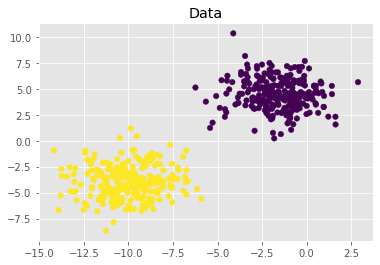

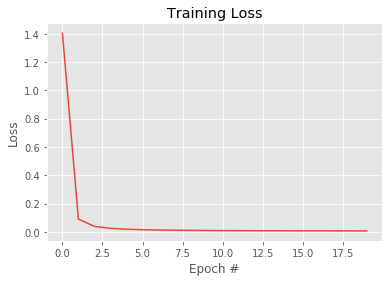

In [ ]:
BATCH_SIZE=32
(X, y) = make_blobs(n_samples=1000, n_features=2, centers=2,cluster_std=1.5, random_state=1)
y = y.reshape((y.shape[0], 1))

# insert a column of 1's as the last entry in the feature
# matrix -- this little trick allows us to treat the bias
# as a trainable parameter within the weight matrix
X = np.c_[X, np.ones((X.shape[0]))]

# partition the data into training and testing splits using 50% of
# the data for training and the remaining 50% for testing
(trainX, testX, trainY, testY) = train_test_split(X, y,test_size=0.5, random_state=42)

# initialize our weight matrix and list of losses
print("[INFO] training...")
W = np.random.randn(X.shape[1], 1)
losses = []

# loop over the desired number of epochs
for epoch in np.arange(0, EPOCHS):
	# initialize the total loss for the epoch
	epochLoss = []

	# loop over our data in batches
	for (batchX, batchY) in next_batch(trainX, trainY, BATCH_SIZE):
		# take the dot product between our current batch of features
		# and the weight matrix, then pass this value through our
		# activation function
		preds = sigmoid_activation(batchX.dot(W))

		# now that we have our predictions, we need to determine the
		# `error`, which is the difference between our predictions
		# and the true values
		error = preds - batchY
		epochLoss.append(np.sum(error ** 2))

		# the gradient descent update is the dot product between our
		# (1) current batch and (2) the error of the sigmoid
		# derivative of our predictions
		d = error * sigmoid_deriv(preds)
		gradient = batchX.T.dot(d)

		# in the update stage, all we need to do is "nudge" the
		# weight matrix in the negative direction of the gradient
		# (hence the term "gradient descent" by taking a small step
		# towards a set of "more optimal" parameters
		W += -LEARNING_RATE * gradient

	# update our loss history by taking the average loss across all
	# batches
	loss = np.average(epochLoss)
	losses.append(loss)

	# check to see if an update should be displayed
	if epoch == 0 or (epoch + 1) % 5 == 0:
		print("[INFO] epoch={}, loss={:.7f}".format(int(epoch + 1),
			loss))

# evaluate our model
print("[INFO] evaluating...")
preds = predict(testX, W)
print(classification_report(testY, preds))

# plot the (testing) classification data
plt.style.use("ggplot")
plt.figure()
plt.title("Data")
plt.scatter(testX[:, 0], testX[:, 1], marker="o", c=testY[:, 0], s=30)

# construct a figure that plots the loss over time
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, EPOCHS), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

# Loss functions

# Hinge loss function for multi-class classification

For each i-th object its class score s_i,j with respect to j-th class is computed and then the loss functio is calculated. In the equation s_yi is the score with respect to the true class y_i of i-th object. 

![alt text](https://sites.google.com/site/zbislawtabor/dydaktyka/ml/Fig3.png)

---


![alt text](https://sites.google.com/site/zbislawtabor/dydaktyka/ml/Fig4.png)

**Loss for dog**

max(0, 1.33 - 4.26 + 1) + max(0, -1.01 - 4.26 + 1) = 0

**Loss for cat**

max(0, 3.76 - (-1.20) + 1) + max(0, -3.81 - (-1.20) + 1) = 5,96

**Loss for panda:**

max(0, -2.37 - (-2.27) + 1) + max(0, 1.03 - (-2.27) + 1) = 5.2



---



# Cross entropy loss
![alt text](https://sites.google.com/site/zbislawtabor/dydaktyka/ml/Fig5.png)



---

![alt text](https://sites.google.com/site/zbislawtabor/dydaktyka/ml/Fig6.png)


# Further topics concerning gradient descent

https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d

Momentum and esterov correction
![alt text](https://sites.google.com/site/zbislawtabor/dydaktyka/ml/Fig7.png)



# Regularization

![alt text](https://sites.google.com/site/zbislawtabor/dydaktyka/ml/Fig8.png)